In [1]:
import numpy as np
import math
import scipy.misc
from matplotlib.pyplot import imshow
from keras.applications import vgg16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions

Using Theano backend.


In [2]:
model = vgg16.VGG16(include_top = True, weights = "imagenet")
model.summary()

/home/vendy/anaconda3/lib/python3.7/site-packages/keras/utils/conv_utils.py:82: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.copy(kernel[slices])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

/home/vendy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


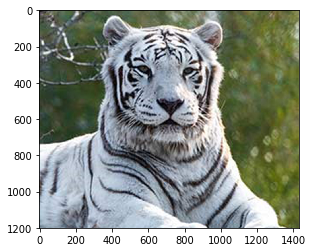

In [3]:
img_path = "/home/vendy/Desktop/tiger.jpg"
my_image = scipy.misc.imread(img_path)
imshow(my_image)

In [4]:
img = image.load_img(img_path, target_size=(224, 224))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = preprocess_input(img_arr)
print("Input image shape:", img_arr.shape)

Input image shape: (1, 224, 224, 3)


In [5]:
preds = model.predict(img_arr)
list_pred = list(decode_predictions(preds)[0][0])
list_pred[2] = math.floor(float(list_pred[2])*100)
print("I, the VGG16 network, can say with {}% surety that the given image is {}".format(list_pred[2],list_pred[1]))

I, the VGG16 network, can say with 76% surety that the given image is tiger
